In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import time
import scipy.stats as stats
import os
from math import radians, cos, sin, asin, sqrt
from statistics import mean
import pandas as pd

In [15]:
array = [random.randint(1, 100) for i in range(10)]
print(array)

[20, 24, 8, 99, 89, 55, 38, 56, 43, 25]


In [26]:
def string_trace_back(trace):
    T = []
    for i in range(0,len(trace)-1):
        T.append([trace[i], trace[i+1]])
    return T

In [124]:
path = string_trace_back(int_array)
path

[[[[2426, 2584], [2584, 2583]], [[2584, 2583], [2583, 2732]]],
 [[[2584, 2583], [2583, 2732]], [[2583, 2732], [2732, 2582]]],
 [[[2583, 2732], [2732, 2582]], [[2732, 2582], [2582, 2731]]],
 [[[2732, 2582], [2582, 2731]], [[2582, 2731], [2731, 2877]]],
 [[[2582, 2731], [2731, 2877]], [[2731, 2877], [2877, 3026]]],
 [[[2731, 2877], [2877, 3026]], [[2877, 3026], [3026, 2876]]],
 [[[2877, 3026], [3026, 2876]], [[3026, 2876], [2876, 2730]]],
 [[[3026, 2876], [2876, 2730]], [[2876, 2730], [2730, 2580]]],
 [[[2876, 2730], [2730, 2580]], [[2730, 2580], [2580, 2729]]],
 [[[2730, 2580], [2580, 2729]], [[2580, 2729], [2729, 2579]]],
 [[[2580, 2729], [2729, 2579]], [[2729, 2579], [2579, 2728]]],
 [[[2729, 2579], [2579, 2728]], [[2579, 2728], [2728, 2578]]],
 [[[2579, 2728], [2728, 2578]], [[2728, 2578], [2578, 2727]]],
 [[[2728, 2578], [2578, 2727]], [[2578, 2727], [2727, 2577]]],
 [[[2578, 2727], [2727, 2577]], [[2727, 2577], [2577, 2424]]],
 [[[2727, 2577], [2577, 2424]], [[2577, 2424], [2424, 2

In [100]:
f = 'VBEA/dao-map/den001d.map'

# iterate over files in that directory
# checking if it is a file
print(f)
file1 = open(f, "r")
lines = file1.readlines()
file1.close()

maptype = lines[0][5:].rstrip('\n')
height = lines[1][7:].rstrip('\n')
width = lines[2][6:].rstrip('\n')
# print(maptype,height,width)
maparray = []
for line in lines[4:]:
     maparray.append(list(line.rstrip('\n')))
#print(maparray)
#print(len(maparray), len(maparray[0]))
G = nx.Graph()
for i in range(len(maparray)):
    for j in range(len(maparray[0])):
        if maparray[i][j] == '.':
            if i+1 < len(maparray) and maparray[i+1][j] == '.':
                G.add_edge((i,j), (i+1,j))
            if j+1 < len(maparray[0]) and maparray[i][j+1] == '.':
                G.add_edge((i,j), (i,j+1))
            if i+1 < len(maparray) and j+1 < len(maparray[0]) and maparray[i+1][j+1] == '.':
                G.add_edge((i,j), (i+1,j+1))
            if i-1 >= 0 and j+1 < len(maparray[0]) and maparray[i-1][j+1] == '.':
                G.add_edge((i,j), (i-1,j+1))
# print(G.edges())
    
#remove any nodes that are not connected to the largest component of the graph
if not nx.is_connected(G):
    largest_component = max(nx.connected_components(G), key=len) # Generate connected components and select the largest
    G = G.subgraph(largest_component) # Create a subgraph of G consisting only of this component
    
    objectives = [] #will contain the list of objectives used
    
    #add a distance objective
    for (u,v) in G.edges(): #loop through edges in graph
        if u[0]==v[0] or u[1]==v[1]:
            G.edges[u,v]["distance"] = 1 #adds a dist cost of 1 to horizontal or vertical edges
        else:
            G.edges[u,v]["distance"] = 1.414 #adds a dist cost of 1 to horizontal or vertical edges
    objectives.append("distance")      
    
    #add a uniform cost objective
    for edge in G.edges(): #loop through edges in graph
        G.edges[edge]["uniform"] = 1.5 #adds a uniform cost to all edges
    objectives.append("uniform")        
    
    #add a random cost objective
    randmin = 2
    randmax = 20
    for edge in G.edges(): #loop through edges in graph
        G.edges[edge]["random"] = random.randint(randmin,randmax) #adds a random cost to all edges
    objectives.append("random")    

    #add a safety objective
    for edge in G.edges():
        G.edges[edge]["safety"] = (10-G.degree(edge[0]) + 10-G.degree(edge[1]))/2 #adds a safety cost to each edge = the average of the max degree minus the degree of each node on the edge's ends
    objectives.append("safety")
    
    #add an objective where approximately x% of the nodes are more costly to navigate through
    for node in G.nodes():
        if random.random() <= 0.1: #this is set to 10%
            for ed in G.edges(node):
                G.edges[ed]["dangerous"] = 10 #if a node is selected, then make the cost of all edges from that node 10
        else:
            for ed in G.edges(node):
                if not G.edges[ed].get("dangerous"):
                    G.edges[ed]["dangerous"] = 1.5 #if a node is not selected, make the cost of all edges 1.5, unless it was already set to 10
    objectives.append("dangerous")

VBEA/dao-map/den001d.map


In [166]:
array = open("VBEA/build/den001d.txt", "r")
path = []
for f in array:
    path.append([int(x) for x in f.split()])
array.close()

In [172]:
n_path = []
for e in path:
    n_path.append(G.nodes[e[0]][e[1]])
n_path

KeyError: 30

NetworkXError: Node 28 has no position.

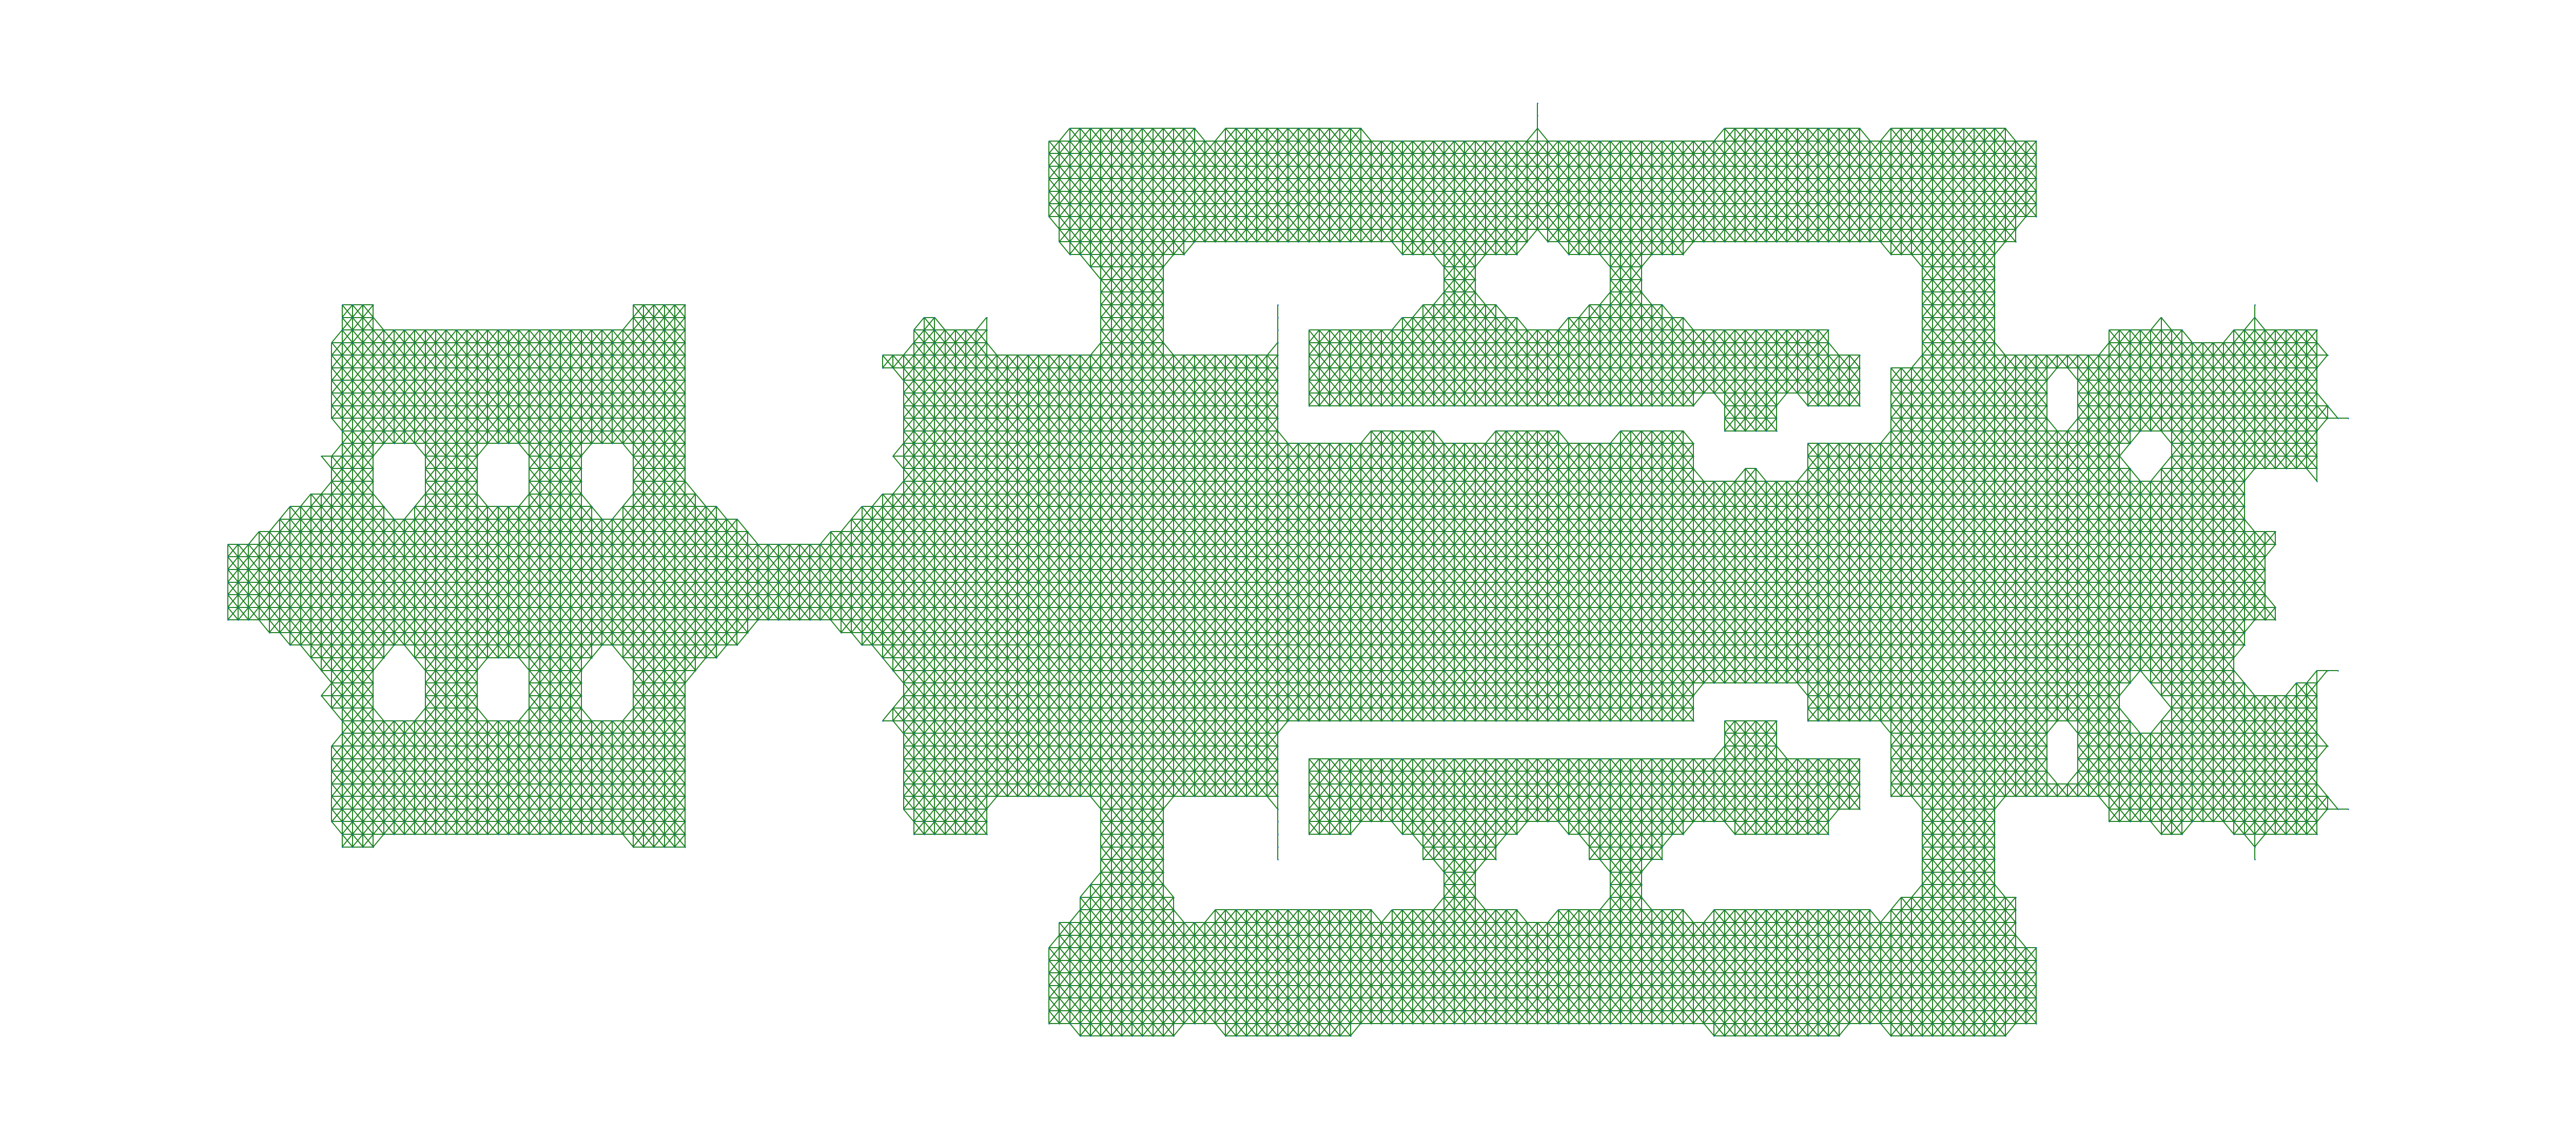

In [170]:
edges = G.edges()
pos = {(x,y):(y,-x) for x,y in G.nodes()}
colors = [0.1, 0.5, 1.0]
for i in range(0, 3):
    plt.figure(figsize=(50,22))
    nx.draw(G, pos, with_labels=False, node_size=1, edge_color = [0.1,0.5,colors[i]], width=1.4, edge_cmap = plt.cm.RdYlGn_r)
    nx.draw_networkx_nodes(G,pos,nodelist=(28,72),node_color='b')
    plt.show()

In [ ]:
directory = 'dao-map'

# iterate over files in that directory
f = os.path.join(directory, filename)
# checking if it is a file
if os.path.isfile(f):
    print(f)
    file1 = open(f, "r")
    lines = file1.readlines()
    file1.close()

    maptype = lines[0][5:].rstrip('\n')
    height = lines[1][7:].rstrip('\n')
    width = lines[2][6:].rstrip('\n')
    # print(maptype,height,width)
    maparray = []
    for line in lines[4:]:
         maparray.append(list(line.rstrip('\n')))
    #print(maparray)
    #print(len(maparray), len(maparray[0]))
    G = nx.Graph()
    for i in range(len(maparray)):
        for j in range(len(maparray[0])):
            if maparray[i][j] == '.':
                if i+1 < len(maparray) and maparray[i+1][j] == '.':
                    G.add_edge((i,j), (i+1,j))
                if j+1 < len(maparray[0]) and maparray[i][j+1] == '.':
                    G.add_edge((i,j), (i,j+1))
                if i+1 < len(maparray) and j+1 < len(maparray[0]) and maparray[i+1][j+1] == '.':
                    G.add_edge((i,j), (i+1,j+1))
                if i-1 >= 0 and j+1 < len(maparray[0]) and maparray[i-1][j+1] == '.':
                    G.add_edge((i,j), (i-1,j+1))
    # print(G.edges())
        
    #remove any nodes that are not connected to the largest component of the graph
    if not nx.is_connected(G):
        largest_component = max(nx.connected_components(G), key=len) # Generate connected components and select the largest
        G = G.subgraph(largest_component) # Create a subgraph of G consisting only of this component
        
        objectives = [] #will contain the list of objectives used
        
        #add a distance objective
        for (u,v) in G.edges(): #loop through edges in graph
            if u[0]==v[0] or u[1]==v[1]:
                G.edges[u,v]["distance"] = 1 #adds a dist cost of 1 to horizontal or vertical edges
            else:
                G.edges[u,v]["distance"] = 1.414 #adds a dist cost of 1 to horizontal or vertical edges
        objectives.append("distance")      
        
        #add a uniform cost objective
        for edge in G.edges(): #loop through edges in graph
            G.edges[edge]["uniform"] = 1.5 #adds a uniform cost to all edges
        objectives.append("uniform")        
        
        #add a random cost objective
        randmin = 2
        randmax = 20
        for edge in G.edges(): #loop through edges in graph
            G.edges[edge]["random"] = random.randint(randmin,randmax) #adds a random cost to all edges
        objectives.append("random")    

        #add a safety objective
        for edge in G.edges():
            G.edges[edge]["safety"] = (10-G.degree(edge[0]) + 10-G.degree(edge[1]))/2 #adds a safety cost to each edge = the average of the max degree minus the degree of each node on the edge's ends
        objectives.append("safety")
        
        #add an objective where approximately x% of the nodes are more costly to navigate through
        for node in G.nodes():
            if random.random() <= 0.1: #this is set to 10%
                for ed in G.edges(node):
                    G.edges[ed]["dangerous"] = 10 #if a node is selected, then make the cost of all edges from that node 10
            else:
                for ed in G.edges(node):
                    if not G.edges[ed].get("dangerous"):
                        G.edges[ed]["dangerous"] = 1.5 #if a node is not selected, make the cost of all edges 1.5, unless it was already set to 10
        objectives.append("dangerous")

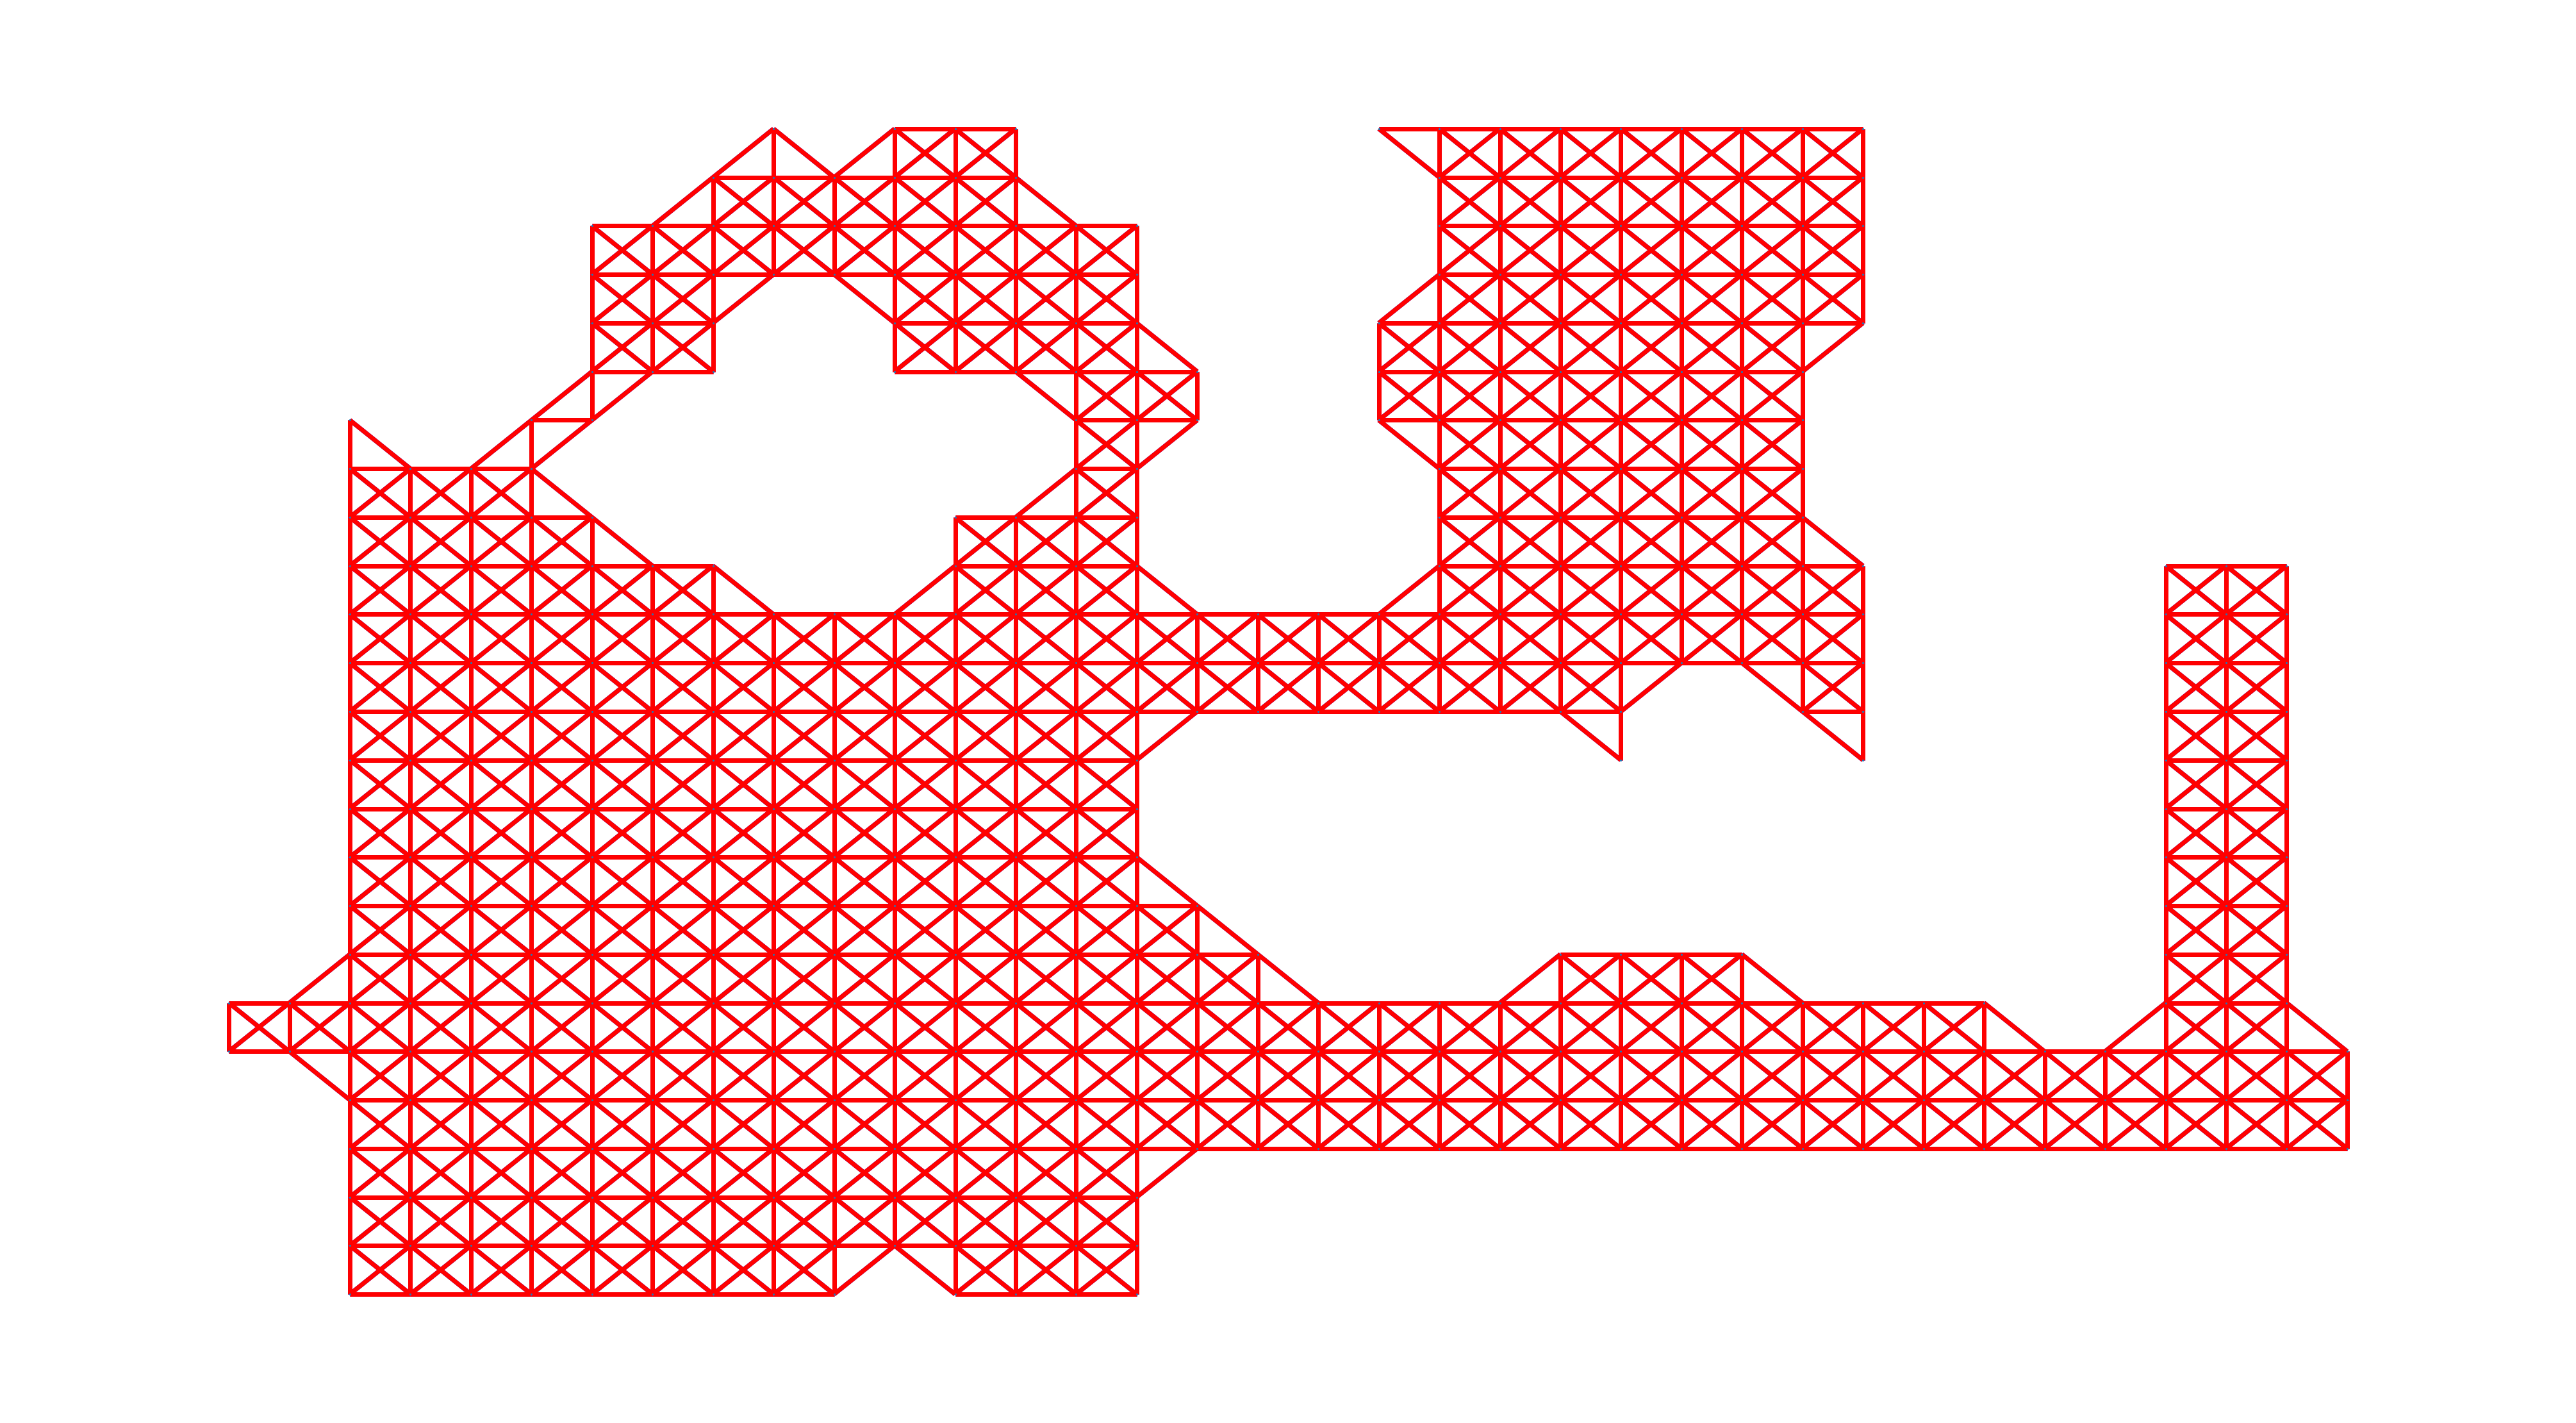

In [76]:
edges = G.edges()
pos = {(x,y):(y,-x) for x,y in G.nodes()}
plt.figure(figsize=(40,22))
nx.draw(G, pos, with_labels=False, node_size=1, edge_color = [0,0,1], width=5, edge_cmap = plt.cm.RdYlGn_r)

In [53]:
for u,v in edges:
    for x in G[u][v]:
        print(x, G[u][v][x])
    print("---")

distance 1
uniform 1.5
random 13
safety 5.5
dangerous 1.5
---
distance 1.414
uniform 1.5
random 3
safety 5.0
dangerous 1.5
---
distance 1.414
uniform 1.5
random 13
safety 6.0
dangerous 1.5
---
distance 1
uniform 1.5
random 17
safety 4.5
dangerous 1.5
---
distance 1
uniform 1.5
random 19
safety 3.0
dangerous 1.5
---
distance 1
uniform 1.5
random 2
safety 3.5
dangerous 1.5
---
distance 1.414
uniform 1.5
random 15
safety 3.0
dangerous 10
---
distance 1.414
uniform 1.5
random 3
safety 3.5
dangerous 1.5
---
distance 1
uniform 1.5
random 14
safety 2.5
dangerous 10
---
distance 1
uniform 1.5
random 4
safety 3.0
dangerous 10
---
distance 1.414
uniform 1.5
random 16
safety 2.5
dangerous 10
---
distance 1.414
uniform 1.5
random 14
safety 4.5
dangerous 1.5
---
distance 1.414
uniform 1.5
random 16
safety 2.5
dangerous 1.5
---
distance 1
uniform 1.5
random 10
safety 4.5
dangerous 10
---
distance 1
uniform 1.5
random 6
safety 5.5
dangerous 1.5
---
distance 1.414
uniform 1.5
random 18
safety 4.0
dang